In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm
from sklearn.linear_model import *
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [38]:
df = pd.read_csv(r"C:\Users\heman\Downloads\automobile (2).csv")
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [39]:
num_cols = [i for i in df.columns if df[i].dtype!='O']

In [40]:
num_cols

['symboling',
 'normalized-losses',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-size',
 'compression-ratio',
 'city-mpg',
 'highway-mpg',
 'price']

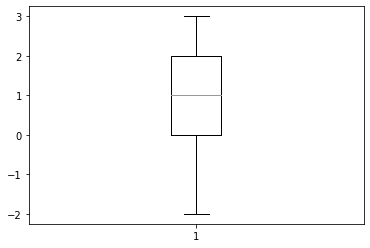

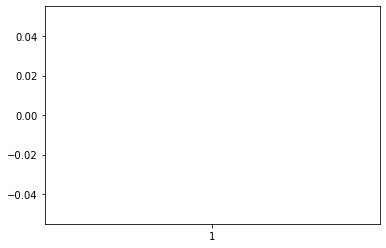

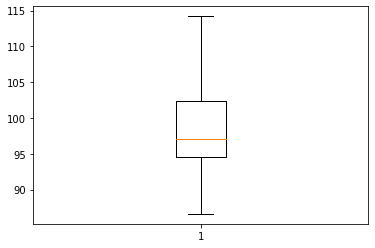

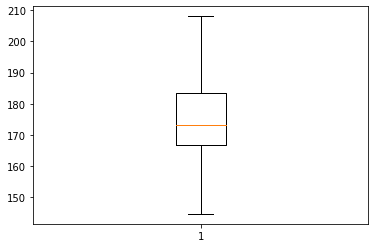

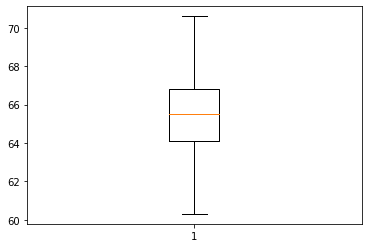

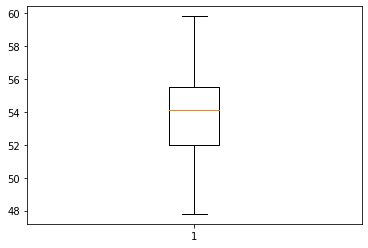

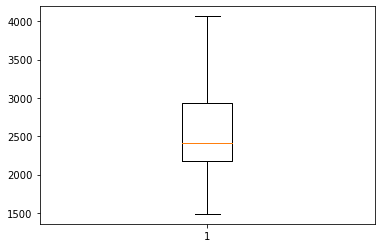

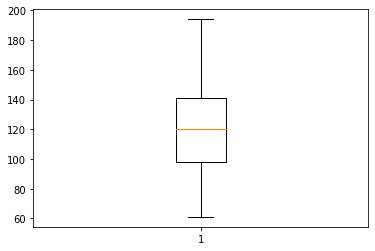

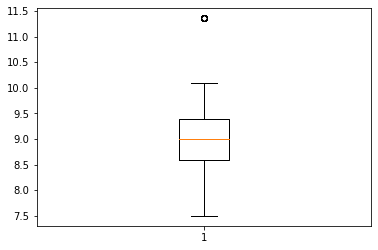

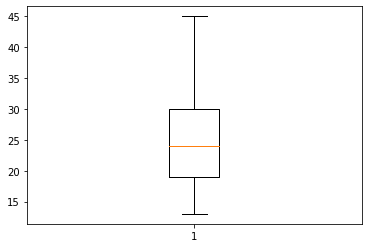

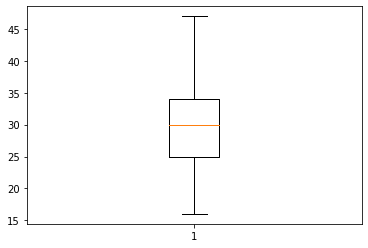

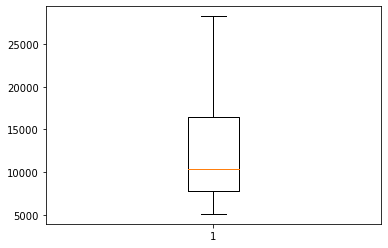

In [41]:
for i in num_cols:
    iqr = df[i].quantile(0.75) - df[i].quantile(0.25)
    higher = df[i].quantile(0.9)
    lower = df[i].quantile(0.1)
    lower_range = df[i].quantile(0.25) - (iqr*1.5)
    higher_range = df[i].quantile(0.75) + (iqr*1.5)
    df[i] = np.where(df[i] > higher_range,higher,df[i])
    df[i] = np.where(df[i] < lower_range,lower,df[i])  
    plt.boxplot(df[i])
    plt.show()

In [42]:
df.isnull().mean()*100

symboling             0.000000
normalized-losses    18.316832
make                  0.000000
fuel-type             0.000000
aspiration            0.000000
num-of-doors          0.990099
body-style            0.000000
drive-wheels          0.000000
engine-location       0.000000
wheel-base            0.000000
length                0.000000
width                 0.000000
height                0.000000
curb-weight           0.000000
engine-type           0.000000
num-of-cylinders      0.000000
engine-size           0.000000
fuel-system           0.000000
bore                  0.000000
stroke                0.000000
compression-ratio     0.000000
horsepower            0.000000
peak-rpm              0.000000
city-mpg              0.000000
highway-mpg           0.000000
price                 0.000000
dtype: float64

In [43]:
df['normalized-losses'].fillna(df['normalized-losses'].median(),inplace=True)

In [44]:
df['normalized-losses'].isnull().mean()*100

0.0

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          202 non-null    float64
 1   normalized-losses  202 non-null    float64
 2   make               202 non-null    object 
 3   fuel-type          202 non-null    object 
 4   aspiration         202 non-null    object 
 5   num-of-doors       200 non-null    object 
 6   body-style         202 non-null    object 
 7   drive-wheels       202 non-null    object 
 8   engine-location    202 non-null    object 
 9   wheel-base         202 non-null    float64
 10  length             202 non-null    float64
 11  width              202 non-null    float64
 12  height             202 non-null    float64
 13  curb-weight        202 non-null    float64
 14  engine-type        202 non-null    object 
 15  num-of-cylinders   202 non-null    object 
 16  engine-size        202 non

In [46]:
cat_cols = [i for i in df.columns.tolist() if df[i].dtype=='O']

In [47]:
len(cat_cols)

14

In [48]:
for i in cat_cols:
    df[i] = LabelEncoder().fit_transform(df[i])

In [49]:
import statsmodels.api as sm

In [50]:
#df.corr().iloc[:,[-1]]

In [51]:
df.drop(['symboling','num-of-cylinders','curb-weight','city-mpg','normalized-losses','fuel-system','length','compression-ratio','wheel-base','engine-type','highway-mpg','peak-rpm','bore','aspiration','num-of-doors','body-style'],inplace=True,axis=1)

In [52]:
target = df[['price']]
inputs = df.drop('price',axis=1)

In [53]:
intercept = np.ones((inputs.shape[0],1))

inputs = np.hstack([intercept,inputs])
x = np.delete(inputs,5,axis=1)

model = sm.OLS(target,inputs).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     142.6
Date:                Fri, 10 Jun 2022   Prob (F-statistic):           4.77e-80
Time:                        18:41:51   Log-Likelihood:                -1823.9
No. Observations:                 202   AIC:                             3668.
Df Residuals:                     192   BIC:                             3701.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9.255e+04   8115.202    -11.405      0.000   -1.09e+05   -7.65e+04
x1          -157.5371     25.053     -6.288      0.000    -206.952    -108.122
x2          -864.8986    550.839     -1.570      0.118   -1951.372     221.575
x3          1632.7555    336.890      4.847      0.000     968.276    2297.235
x4          6922.0953   1406.679      4.921      0.000    4147.567    9696.624
x5          1355.5342    133.414     10.160      0.000    1092.389    1618.679
x6           241.9060     69.272      3.492      0.001     105.275     378.537
x7            52.6355      8.205      6.415      0.000      36.452      68.818
x8           -66.0104     18.671     -3.535      0.001    -102.837     -29.184
x9           -66.8760      8.718     -7.671      0.000     -84.072     -49.680
==============================================================================
Omnibus:                        5.782   Durbin-Watson:                   1.203
Prob(Omnibus):                  0.056   Jarque-Bera (JB):                5.412
Skew:                           0.373   Prob(JB):                       0.0668
Kurtosis:                       3.296   Cond. No.                     8.75e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
for i in range(inputs.shape[1]):
    print(i,variance_inflation_factor(inputs,i))

0 3103.2419343791994
1 1.156047731349313
2 1.2754552513353299
3 1.6178769655427836
4 1.3642016259692458
5 2.9129672752685924
6 1.3447682079563428
7 2.9949658902906084
8 1.3032707339906402
9 1.19226179489487


## LINEAR REGRESSION


In [55]:
df.shape

(202, 10)

In [56]:
target = df[['price']]
inputs = df.drop('price',axis=1)
x = np.random.random((9,1))
c = np.random.random()
lr = 0.0000001

In [57]:
costs = []
for i in tqdm(range(2000)):
    prediction = np.dot(inputs,x)
    loss = target - prediction
    cost = np.sum((prediction - target)**2)
    costs.append(cost)
    gradient = 2*np.dot(inputs.T,loss) / df.shape[0]
    x = x - lr * -gradient

100%|█████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:03<00:00, 611.45it/s]


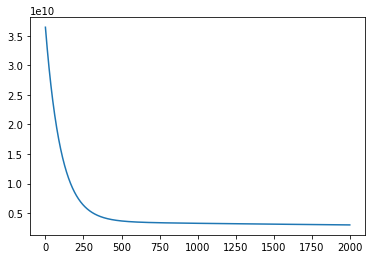

In [58]:
plt.plot(range(2000),costs)

In [59]:
target.iloc[0]

price    13495.0
Name: 0, dtype: float64

In [60]:
def cost_function(prediction,target,sample_size):
    return  np.sqrt(np.sum((prediction - target)**2) / sample_size)

In [61]:
reg_table = {}
manual_calc = []
sklearn_calc = []

In [62]:
target.loc[0][0]

13495.0

In [64]:
reg = LinearRegression()
print(reg)
reg.fit(inputs,target)
print('manual calc',np.dot(inputs,x)[-1])
manual_calc.append(np.dot(inputs,x)[-1])
print('sklearn calc',reg.predict([inputs.iloc[0].values]))
sklearn_calc.append(reg.predict([inputs.iloc[0].values]))
print('target',target.loc[0][0])
print([cost_function(np.dot(inputs,x),target,df.shape[0])[0],cost_function(reg.predict(inputs.values),target,df.shape[0])[0]])
r2_score(target,reg.predict(inputs))

LinearRegression()
manual calc [14198.8750528]
sklearn calc [[14787.2902945]]
target 13495.0
[3851.107713466687, 2018.5620562961205]


0.8698697887797231

In [65]:
reg = Ridge()
print(reg)
reg.fit(inputs,target)
print('manual calc',np.dot(inputs,x)[-1])
manual_calc.append(np.dot(inputs,x)[-1])
print('sklearn calc',reg.predict([inputs.iloc[0].values]))
sklearn_calc.append(reg.predict([inputs.iloc[0].values]))
print('target',target.loc[0][0])
print([cost_function(np.dot(inputs,x),target,df.shape[0])[0],cost_function(reg.predict(inputs.values),target,df.shape[0])[0]])
r2_score(target,reg.predict(inputs))

Ridge()
manual calc [14198.8750528]
sklearn calc [[15036.40469825]]
target 13495.0
[3851.107713466687, 2031.3349776894454]


0.8682177199202129

In [66]:
reg = MultiTaskLasso()
print(reg)
reg.fit(inputs,target)
print('manual calc',np.dot(inputs,x)[-1])
manual_calc.append(np.dot(inputs,x)[-1])
print('sklearn calc',reg.predict([inputs.iloc[0].values]))
sklearn_calc.append(reg.predict([inputs.iloc[0].values]))
print('target',target.loc[0][0])
print([cost_function(np.dot(inputs,x),target,df.shape[0])[0],cost_function(reg.predict(inputs.values),target,df.shape[0])[0]])
r2_score(target,reg.predict(inputs))

MultiTaskLasso()
manual calc [14198.8750528]
sklearn calc [[14792.80012809]]
target 13495.0
[3851.107713466687, 2018.588962559046]


0.8698663196359313

In [72]:
reg = BayesianRidge()
print(reg)
reg.fit(inputs,target)
print('manual calc',np.dot(inputs,x)[-1])
manual_calc.append(np.dot(inputs,x)[-1])
print('sklearn calc',reg.predict([inputs.iloc[0].values]))
sklearn_calc.append(reg.predict([inputs.iloc[0].values]))
print('target',target.loc[0][0])
print(r2_score(target,reg.predict(inputs)))
#print([cost_function(np.dot(inputs,x),target,df.shape[0])[0],cost_function(reg.predict(inputs.values),target,df.shape[0])[0]])

BayesianRidge()
manual calc [14198.8750528]
sklearn calc [15159.96001692]
target 13495.0
0.8657843211058686


In [73]:
reg = TweedieRegressor()
print(reg)
reg.fit(inputs,target)
print('manual calc',np.dot(inputs,x)[-1])
manual_calc.append(np.dot(inputs,x)[-1])
print('sklearn calc',reg.predict([inputs.iloc[0].values]))
sklearn_calc.append(reg.predict([inputs.iloc[0].values]))
print('target',target.loc[0][0])
print(r2_score(target,reg.predict(inputs)))
#print([cost_function(np.dot(inputs,x),target,df.shape[0])[0],cost_function(reg.predict(inputs.values),target,df.shape[0])[0]])

TweedieRegressor()
manual calc [14198.8750528]
sklearn calc [15405.26681821]
target 13495.0
0.8062981559143312


In [74]:
reg = QuantileRegressor()
print(reg)
reg.fit(inputs,target)
print('manual calc',np.dot(inputs,x)[-1])
manual_calc.append(np.dot(inputs,x)[-1])
print('sklearn calc',reg.predict([inputs.iloc[0].values]))
sklearn_calc.append(reg.predict([inputs.iloc[0].values]))
print('target',target.loc[0][0])
print(r2_score(target,reg.predict(inputs)))
#print([cost_function(np.dot(inputs,x),target,df.shape[0])[0],cost_function(reg.predict(inputs.values),target,df.shape[0])[0]])

QuantileRegressor()
manual calc [14198.8750528]
sklearn calc [14302.44525311]
target 13495.0
0.7042533693876819


In [75]:
tss = np.sum((target - target.mean()[0]) ** 2)
rss = np.sum((prediction - target) ** 2)

1 - (rss/tss)

price    0.526303
dtype: float64

In [76]:
from sklearn.metrics import r2_score

r2_score(target,prediction)

0.5263030581015908

### Among all the regression models the noraml linear regression gives the best accuracy. 

### In other regression models,model is fed with greater punishment to not allow the model to overfit .